![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

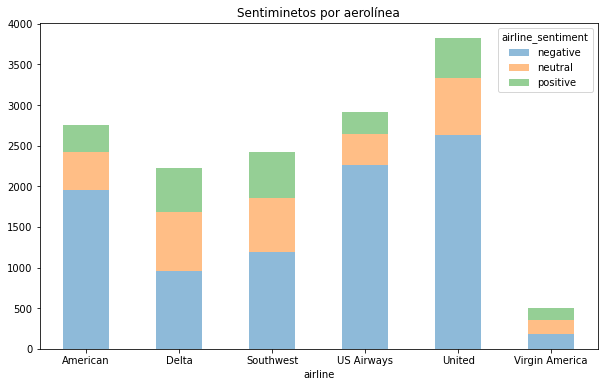

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1
# no usamos N gramas porque no vimos un aumento significativo en el accuracy del modelo, todo lo volvimos minuscuclas
# Ignoramos los acentos porque los tweets son en ingles y quitamos los errores del encoding  

vect_A = CountVectorizer(lowercase=True, decode_error='ignore', strip_accents='ascii')
X_dtm_A = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)

In [12]:
# Impresión dimensiones de matriz de documentos donde las filas son documentos y las columnas son términos o tokens
X_dtm_A.shape

(9808, 12071)

In [13]:
## Random forest 

# Definición de modelo Random Forest para un problema de clasificación
modelo_rf = RandomForestClassifier()
# Predicción y desempeño al hacer votación mayoritaria
modelo_rf.fit(X_dtm_A, y_train)
y_pred = modelo_rf.predict(X_dtm_A_test)

El Accuracy del RF Modelo1  es 0.7688327814569537

La Precision del RF Modelo1  es [0.77306992 0.68229167 0.85085575]

La matriz de confusion es:


<AxesSubplot:>

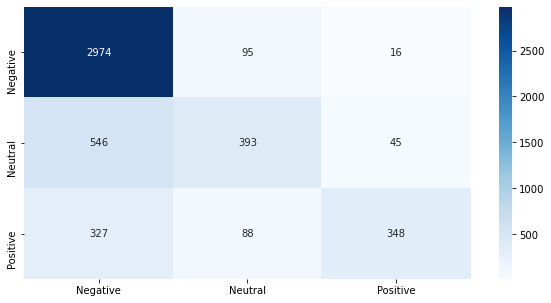

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

## accuracy 
Accuracy_Modelo1=accuracy_score(y_true=y_test, y_pred=y_pred)
## precision
precision_Modelo1=precision_score(y_true=y_test, y_pred=y_pred, average=None)
print('El Accuracy del RF Modelo1  es', str(Accuracy_Modelo1))
print('')
print('La Precision del RF Modelo1  es', str(precision_Modelo1))


print('')
print('La matriz de confusion es:')
# matriz de confusion
#print(confusion_matrix(y_true=yTest, y_pred=prediccionesLDA))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, 
            fmt='', cmap='Blues', xticklabels=['Negative', 'Neutral', "Positive"], 
            yticklabels=['Negative', 'Neutral', "Positive"])


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 2
# no usamos N gramas porque no vimos un aumento significativo en el accuracy del modelo, todo lo volvimos minuscuclas
# Ignoramos los acentos porque los tweets son en ingles y quitamos los errores del encoding

vect_A = CountVectorizer(lowercase=True, decode_error='ignore', strip_accents='ascii', stop_words='english')
X_dtm_A = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)

In [16]:
# Impresión dimensiones de matriz de documentos donde las filas son documentos y las columnas son términos o tokens
X_dtm_A.shape

(9808, 11792)

In [17]:
## Random forest 

# Definición de modelo Random Forest para un problema de clasificación
modelo_rf = RandomForestClassifier()
# Predicción y desempeño al hacer votación mayoritaria
modelo_rf.fit(X_dtm_A, y_train)
y_pred = modelo_rf.predict(X_dtm_A_test)

El Accuracy del RF Modelo2  es 0.7636589403973509

La Precision del RF Modelo2  es [0.82246921 0.57751479 0.70516717]

La matriz de confusion es:


<AxesSubplot:>

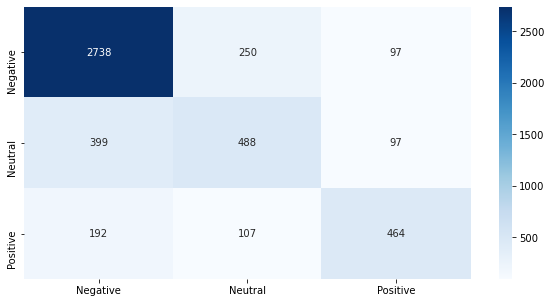

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

## accuracy 
Accuracy_Modelo2=accuracy_score(y_true=y_test, y_pred=y_pred)
## precision
precision_Modelo2=precision_score(y_true=y_test, y_pred=y_pred, average=None)
print('El Accuracy del RF Modelo2  es', str(Accuracy_Modelo2))
print('')
print('La Precision del RF Modelo2  es', str(precision_Modelo2))


print('')
print('La matriz de confusion es:')
# matriz de confusion
#print(confusion_matrix(y_true=yTest, y_pred=prediccionesLDA))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, 
            fmt='', cmap='Blues', xticklabels=['Negative', 'Neutral', "Positive"], 
            yticklabels=['Negative', 'Neutral', "Positive"])

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
# Celda 3
# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

In [21]:
# Creación de matrices de documentos usando CountVectorizer, usando el parámetro 'split_into_lemmas'
# no usamos N gramas porque no vimos un aumento significativo en el accuracy del modelo, todo lo volvimos minuscuclas
# Ignoramos los acentos porque los tweets son en ingles y quitamos los errores del encoding
vect_lemas = CountVectorizer(analyzer=split_into_lemmas, lowercase=True, decode_error='ignore', strip_accents='ascii')

In [22]:
# Definición de función que recibe un texto vectorizado 
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X_train)
    X_dtm_test = vect.transform(X_test)
    print('Features: ', X_dtm.shape[1])
    modelo_rf = RandomForestClassifier()
    modelo_rf.fit(X_dtm_A, y_train)
    y_pred = modelo_rf.predict(X_dtm_A_test)
    Accuracy_Modelo2=accuracy_score(y_true=y_test, y_pred=y_pred)        
    precision_Modelo2=precision_score(y_true=y_test, y_pred=y_pred, average=None)
    print('El Accuracy del RF Modelo3  es', str(Accuracy_Modelo2))
    print('')
    print('La Precision del RF Modelo3  es', str(precision_Modelo2))
    print('')
    print('La matriz de confusion es:')
    # matriz de confusion
    #print(confusion_matrix(y_true=yTest, y_pred=prediccionesLDA))
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm, annot=True, 
    fmt='', cmap='Blues', xticklabels=['Negative', 'Neutral', "Positive"], 
    yticklabels=['Negative', 'Neutral', "Positive"])

Features:  19380
El Accuracy del RF Modelo3  es 0.7634519867549668

La Precision del RF Modelo3  es [0.8228382  0.57159353 0.71561051]

La matriz de confusion es:


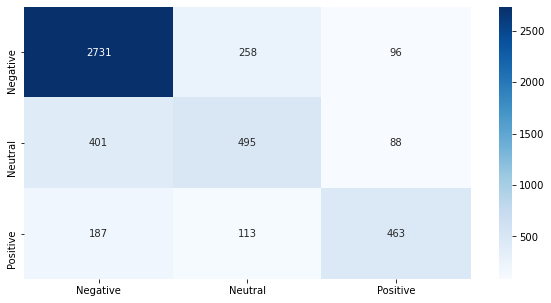

In [23]:
# Desempeño del modelo al lematizar el texto
tokenize_test(vect_lemas)

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [24]:
# Creación de matrices de documentos usando CountVectorizer, usando el parámetro 'split_into_lemmas'
# no usamos N gramas porque no vimos un aumento significativo en el accuracy del modelo, todo lo volvimos minuscuclas
# Ignoramos los acentos porque los tweets son en ingles y quitamos los errores del encoding
vect_lemas = CountVectorizer(analyzer=split_into_lemmas, lowercase=True, decode_error='ignore', strip_accents='ascii',
                             stop_words='english')

In [25]:
# Definición de función que recibe un texto vectorizado y calcula el acurracy 
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X_train)
    X_dtm_test = vect.transform(X_test)
    print('Features: ', X_dtm.shape[1])
    modelo_rf = RandomForestClassifier()
    modelo_rf.fit(X_dtm_A, y_train)
    y_pred = modelo_rf.predict(X_dtm_A_test)
    Accuracy_Modelo2=accuracy_score(y_true=y_test, y_pred=y_pred)        
    precision_Modelo2=precision_score(y_true=y_test, y_pred=y_pred, average=None)
    print('El Accuracy del RF Modelo4  es', str(Accuracy_Modelo2))
    print('')
    print('La Precision del RF Modelo4  es', str(precision_Modelo2))
    print('')
    print('La matriz de confusion es:')
    # matriz de confusion
    #print(confusion_matrix(y_true=yTest, y_pred=prediccionesLDA))
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm, annot=True, 
    fmt='', cmap='Blues', xticklabels=['Negative', 'Neutral', "Positive"], 
    yticklabels=['Negative', 'Neutral', "Positive"])

Features:  19380
El Accuracy del RF Modelo4  es 0.7620033112582781

La Precision del RF Modelo4  es [0.8214071  0.56562137 0.71782946]

La matriz de confusion es:


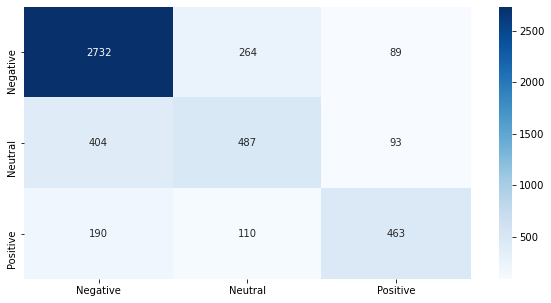

In [26]:
# Desempeño del modelo al lematizar el texto
tokenize_test(vect_lemas)

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

Revizando los 4 modelos Random forest, se encontro que el modelo1 presenta el mejor acurracy, esto se puede deber a que no elimina plabras con la funcion stop_words, como lo son "no", "nor", "not", "but"; las cuales tiene fuertes cognotaciones negativas y podrian propiciar a identificar efectivamente los comentarios negativos, el modelo 1 tuvo un Accuracy de 0.7688.

Por su parte el modelo con el peor desempeño fue el modelo2 con el stopwords, debido a que quitaba las palabras anteriormente mencionadas.

vimos que Lematizar con verbos los textos no mejoraron los desempeños del modelo esto puede ser debido a que los verbos puede que no sean calificativos de sentimientos tan concretos (positivos, negativos o Neutrales), como lo son los adjetivos, sustantivos, etc.   

vamos a utilizar nuestra propia lista de stopwords, que no va a tener en cuenta, eliminar las siguientes palabras:
-  "no", "nor", "not", "have", "has", "had", "having", "do", "does", "did", "doing", "but".

ello debido a que pueden identificar mejor los sentimientos negativos o positivos de un tweet.

Al ajustar el modelo con nuestra propia lista de stopwords no mejora el desempeño significativamente comparado a los otros modelos, se propone para ejercicios posteriores evaluar distintas listas personalizadas de stopwords para intentar mejorar los resultados optenidos.

In [27]:
# Celda 5
my_stopwords= ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", 
 "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs",
 "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be",
 "been", "being", "a", "an", "the", "and",  "if", "or",
 "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", 
 "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", 
 "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", 
 "more", "most", "other", "some", "such", "only", "own", "same", "so", "than", "too", "very", "s", "t", 
 "can", "will", "just", "don", "should", "now"]

In [28]:
vect_A = CountVectorizer(lowercase=True, decode_error='ignore', strip_accents='ascii', stop_words=my_stopwords)
X_dtm_A = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)

In [29]:
# Impresión dimensiones de matriz de documentos donde las filas son documentos y las columnas son términos o tokens
X_dtm_A.shape

(9808, 11962)

In [30]:
## Random forest 
# Definición de modelo Random Forest para un problema de clasificación
modelo_rf = RandomForestClassifier()
# Predicción y desempeño al hacer votación mayoritaria
modelo_rf.fit(X_dtm_A, y_train)
y_pred = modelo_rf.predict(X_dtm_A_test)

El Accuracy del RF Modelo2  es 0.769453642384106

La Precision del RF Modelo2  es [0.81196337 0.60319574 0.72913118]

La matriz de confusion es:


<AxesSubplot:>

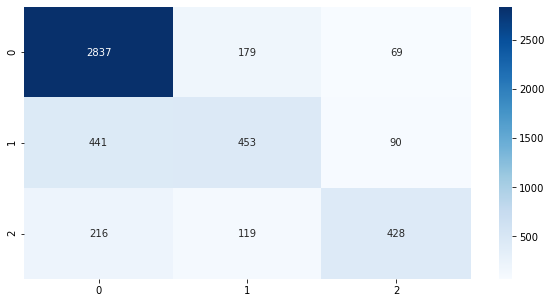

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

## accuracy 
Accuracy_Modelo2=accuracy_score(y_true=y_test, y_pred=y_pred)
## precision
precision_Modelo2=precision_score(y_true=y_test, y_pred=y_pred, average=None)
print('El Accuracy del RF Modelo2  es', str(Accuracy_Modelo2))
print('')
print('La Precision del RF Modelo2  es', str(precision_Modelo2))


print('')
print('La matriz de confusion es:')
# matriz de confusion
#print(confusion_matrix(y_true=yTest, y_pred=prediccionesLDA))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, 
            fmt='', cmap='Blues')

# El Accuracy del RF Modelo2  es 0.7721440397350994